<a href="https://colab.research.google.com/github/carlibeisel/Drains_Lower_Boise_River/blob/main/*water_rights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Water Rights in the Treasure Valley for Drainsheds

By: Carli Beisel


Created on August 2024


Purpose:

1) Crop Water Rights layer to drainshds in the Treasure Valley and also create a separate file that organizes all WR based on priorty year + surface/groundwater.


2) Create a figure showing the difference between surface + groundwater rights.

3) Create a figure showing change in water rights over time based on priorty date.

## 1. Organize IDWR Water Right Data from GIS Data Hub

Separate based on surface/groundwater rights and organize based on priority year.  

In [ ]:
# -------------------- #
#   Import Packages    #
# -------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ----------------------------------- #
#     Rename Drains in LBRB           #
# ----------------------------------- #

# Function to rename names in the 'Name' column of a shapefile
def rename_names_in_shapefile(shapefile_path, output_path, name_mapping):
    """
    Rename names in the 'Name' column of a shapefile.

    Parameters:
    shapefile_path (str): Path to the input shapefile.
    output_path (str): Path to save the modified shapefile.
    name_mapping (dict): Dictionary where keys are old names and values are new names.

    """
    gdf = gpd.read_file(shapefile_path)
    if 'Name' not in gdf.columns:
        raise ValueError("The shapefile does not contain a 'Name' column.")
    gdf['Name'] = gdf['Name'].replace(name_mapping)
    gdf.to_file(output_path)
    print(f"Shapefile with updated names saved to {output_path}")

if __name__ == "__main__":
    input_shapefile = '/content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_Merge_07072022.shp'
    output_shapefile = '/content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_08162024.shp'

    # Dictionary with old names as keys and new names as values
    name_changes = {
        'Dixie drain': 'Dixie Drain',
        'East Hartley Drain': 'East Hartley Gulch',
        'West Hartley': 'West Hartley Gulch',
        'Drainage District No. 3': 'Drainage District No3'
    }

    rename_names_in_shapefile(input_shapefile, output_shapefile, name_changes)

Shapefile with updated names saved to /content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_08162024.shp


In [ ]:
# ----------------------------------- #
#         Crop to the LBRB            #
# ----------------------------------- #
water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/WaterRightPOUs/WaterRightPOUs.shp')
lbrb = gpd.read_file('/content/drive/MyDrive/Data/GIS Shapefiles/LBRB_shp/LBRB_file.shp')

lbrb_water_rights = gpd.overlay(water_rights, lbrb, how='intersection')

lbrb_water_rights.to_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_lbrb_masked/lbrb_water_rights.shp')

<ipython-input-46-8ea92cc00dca>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:8826
Right CRS: EPSG:4326

  lbrb_water_rights = gpd.overlay(water_rights, lbrb, how='intersection')
/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [ ]:
# ----------------------------------- #
#       Convert .SHP to .CSV          #
# ----------------------------------- #
lbrb_water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights/lbrb_water_rights.shp')

wr = pd.DataFrame(water_rights.drop(columns='geometry'))
wr.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv', index=False)


In [ ]:
# ----------------------------------- #
#       Crop WR to Drainsheds         #
# ----------------------------------- #
water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/WaterRightPOUs/WaterRightPOUs.shp')
drainsheds = gpd.read_file('/content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_08162024.shp')
names = drainsheds['Name']
water_rights = water_rights.to_crs(drainsheds.crs)
output_dir = '/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/'

# Create function to crop water rights to each drainshed area
def crop_water_rights_to_drainsheds(water_rights, drainsheds, output_dir):
    mask_gdf = drainsheds
    for i, mask_feature in mask_gdf.iterrows():
        mask_geom = mask_feature['geometry']
        mask_name = mask_feature['Name']

        cropped_gdf = gpd.overlay(water_rights, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')

        output_filename = os.path.join(output_dir, f"{mask_name}_wr.shp")

        # Save the cropped shapefile
        cropped_gdf.to_file(output_filename)
        print(f"Cropped shapefile saved to {output_filename}")

crop_water_rights_to_drainsheds(water_rights, drainsheds, output_dir)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Drain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/East Hartley Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Willow Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Conway Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/ThurmanDrain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/North Middleton_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/South Middleton_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Indian Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Drainage District No3_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Fifteen Mile Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Dixie Drain_wr.shp


In [ ]:
# ----------------------------------- #
#   Convert Drain WR to CSV File      #
# ----------------------------------- #

shapefiles = glob.glob('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/*.shp')

csv_output_dir = '/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/'
for shapefile in shapefiles:
    gdf = gpd.read_file(shapefile)
    base_name = os.path.basename(shapefile)
    drainshed_name = base_name.split('_wr')[0]  # Extracting the part before '_wr'
    gdf['Drainshed'] = drainshed_name #add a column for each drainshed name
    csv_filename = os.path.splitext(base_name)[0] + '.csv'
    csv_filepath = os.path.join(csv_output_dir, csv_filename)
    gdf.to_csv(csv_filepath, index=False)
    print(f"Converted {shapefile} to {csv_filepath} with added 'Drainshed' column.")

Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley Gulch_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley Gulch_wr.csv with added 'Drainshed' column.
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.csv with added 'Drainshed' column.
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.csv with added 'Drainshed' column.
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Drain_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Drain_wr.csv with added 'Drainshed' column.
Conv

In [ ]:
# ----------------------------------------- #
#      Merge drainhed WRs into one file     #
# ----------------------------------------- #

csv_files = glob.glob('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/*.csv')
df_list = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)
merged_df = pd.concat(df_list, ignore_index=True)
merged_df.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv', index=False)

#add in new column to separate GW from SW
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')
file['Type'] = file['Source'].apply(lambda x: 'GW' if x == 'GROUND WATER' else 'SW')
file.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv', index=False)

In [ ]:
# ------------------------------ #
#      Drain WRs Model Input     #
# ------------------------------ #
# based on SW + GW + total

file_path = '/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv'
df = pd.read_csv(file_path)

# Convert 'PriorityDa' column to datetime format and extract the year
df['PriorityDa'] = pd.to_datetime(df['PriorityDa'], format='%Y-%m-%d', errors='coerce')
df['Year'] = df['PriorityDa'].dt.year

# Group by year, type, and drainage area (assuming 'Drainshed' is the column for drainage)
yearly_priority_counts = df.groupby(['Year', 'Type', 'Drainshed']).agg({'PriorityDa': 'nunique'}).reset_index()
yearly_priority_counts.rename(columns={'PriorityDa': 'Water Rights'}, inplace=True)

# Pivot the table to create separate columns for GW and SW water rights for each drainage
pivot_counts = yearly_priority_counts.pivot_table(index=['Year', 'Drainshed'], columns='Type', values='Water Rights', fill_value=0).reset_index()

pivot_counts.columns = ['Year', 'Drainshed', 'GW Water Rights', 'SW Water Rights']

# Add a column for total water rights (GW + SW)
pivot_counts['Total Water Rights'] = pivot_counts['GW Water Rights'] + pivot_counts['SW Water Rights']

# Calculate cumulative water rights (GW, SW, Total) for each drainage area individually
pivot_counts['gw_wr'] = pivot_counts.groupby('Drainshed')['GW Water Rights'].cumsum()
pivot_counts['sw_wr'] = pivot_counts.groupby('Drainshed')['SW Water Rights'].cumsum()
pivot_counts['total_wr'] = pivot_counts.groupby('Drainshed')['Total Water Rights'].cumsum()

# Create a new DataFrame that stores this information
wr_final = pivot_counts

columns_to_save = [
    'Year',         # Year
    'Drainshed',               # Drainage area
    'gw_wr',    # Cumulative Groundwater Water Rights
    'sw_wr',    # Cumulative Surface Water Rights
    'total_wr'  # Cumulative Total Water Rights
]

# Save the selected columns to a new CSV file
output_file_path = '/content/drive/MyDrive/Data/Model Modifications/water_rights/final_wr.csv'
wr_final[columns_to_save].to_csv(output_file_path, index=False)

In [ ]:
output_file_path = '/content/drive/MyDrive/Data/Model Modifications/water_rights/final_wr.csv'

'/content/drive/MyDrive/Data/Model Modifications/water_rights/final_wr.csv'

In [ ]:
output_file_path = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/final_wr.csv')
output_file_path

,Year,Drainshed,gw_wr,sw_wr,total_wr
0,1852,South Middleton,1.0,0.0,1.0
1,1862,Mason Creek,1.0,0.0,1.0
2,1863,Fifteen Mile Creek,0.0,1.0,1.0
3,1863,Indian Creek,0.0,1.0,1.0
4,1864,Dixie Drain,1.0,2.0,3.0
...,...,...,...,...,...
1678,2021,Mason Creek,1314.0,60.0,1374.0
1679,2021,North Middleton,207.0,37.0,244.0
1680,2021,South Middleton,800.0,51.0,851.0
1681,2022,East Hartley Gulch,249.0,25.0,274.0


## 2. Create a figure showing the difference between surface and groundwater rights in the Treasure Valley.

In [1]:
# -------------------- #
#   Import Packages    #
# -------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-3-4b2950b0a0d1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


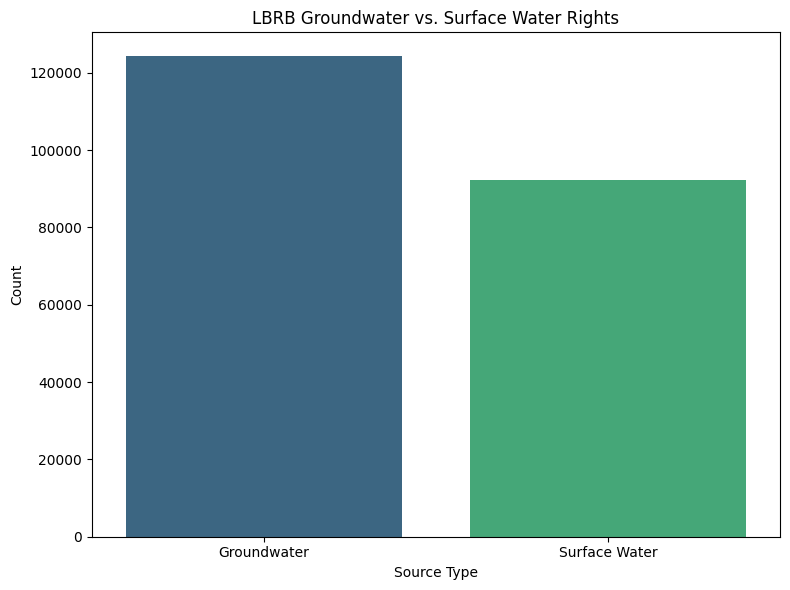

<Figure size 640x480 with 0 Axes>

In [3]:
# ----------------------------------- #
#   Figure for SW/GW in LBRB (bar)    #
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

# Ensure 'Source' column is in the expected format
data['Source'] = data['Source'].astype(str)

groundwater = data[data['Source'] == 'GROUND WATER']
surface_water = data[data['Source'] != 'GROUND WATER']

counts = pd.Series({
    'Groundwater': len(groundwater),
    'Surface Water': len(surface_water)
})

plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

plt.title('LBRB Groundwater vs. Surface Water Rights')
plt.xlabel('Source Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/gw_sw_wr_bar.png')


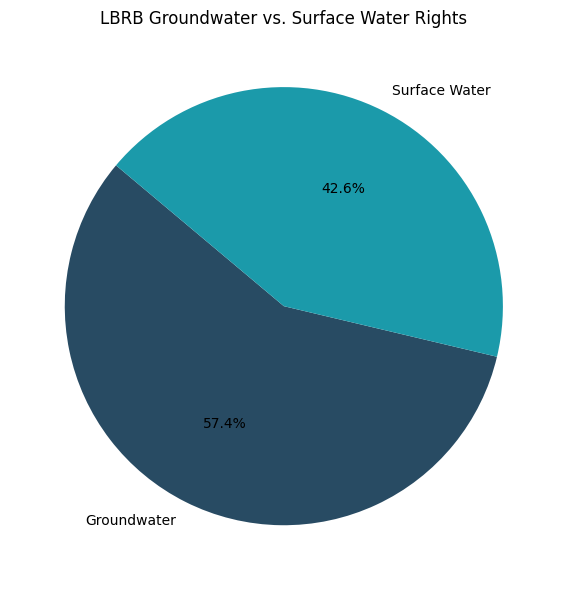

<Figure size 640x480 with 0 Axes>

In [4]:
# ----------------------------------- #
#   Figure for SW/GW in LBRB (pie)    #
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['Source'] = data['Source'].astype(str)

groundwater = data[data['Source'] == 'GROUND WATER']
surface_water = data[data['Source'] != 'GROUND WATER']

counts = pd.Series({
    'Groundwater': len(groundwater),
    'Surface Water': len(surface_water)
})

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#284B63', '#1B9AAA'])
plt.title('LBRB Groundwater vs. Surface Water Rights')

plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/gw_sw_wr_pie.png')

In [ ]:
# ----------------------------------- #
#      SW/GW Comparison in the TV     #
# ----------------------------------- #

#violin plot of all drainages
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['Source'] = data['Source'].astype(str)
data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year
source = data['Source']
year = data['PriorityYear']
fig, axx = plt.subplots(1, 2, figsize=(14, 6))

# Violin plot
sns.violinplot(x=source, y=year, ax=axx[0], palette='muted')
axx[0].set_title('Distribution of Years by Water Source')
axx[0].set_ylim((min(year), max(year)))  # Adjust based on the range of years in your data

# Box plot
sns.boxplot(x=source, y=year, ax=axx[1], palette='muted')
axx[1].set_title('Box Plot of Years by Water Source')
axx[1].set_ylim((min(year), max(year)))  # Adjust based on the range of years in your data

plt.tight_layout()
plt.show()

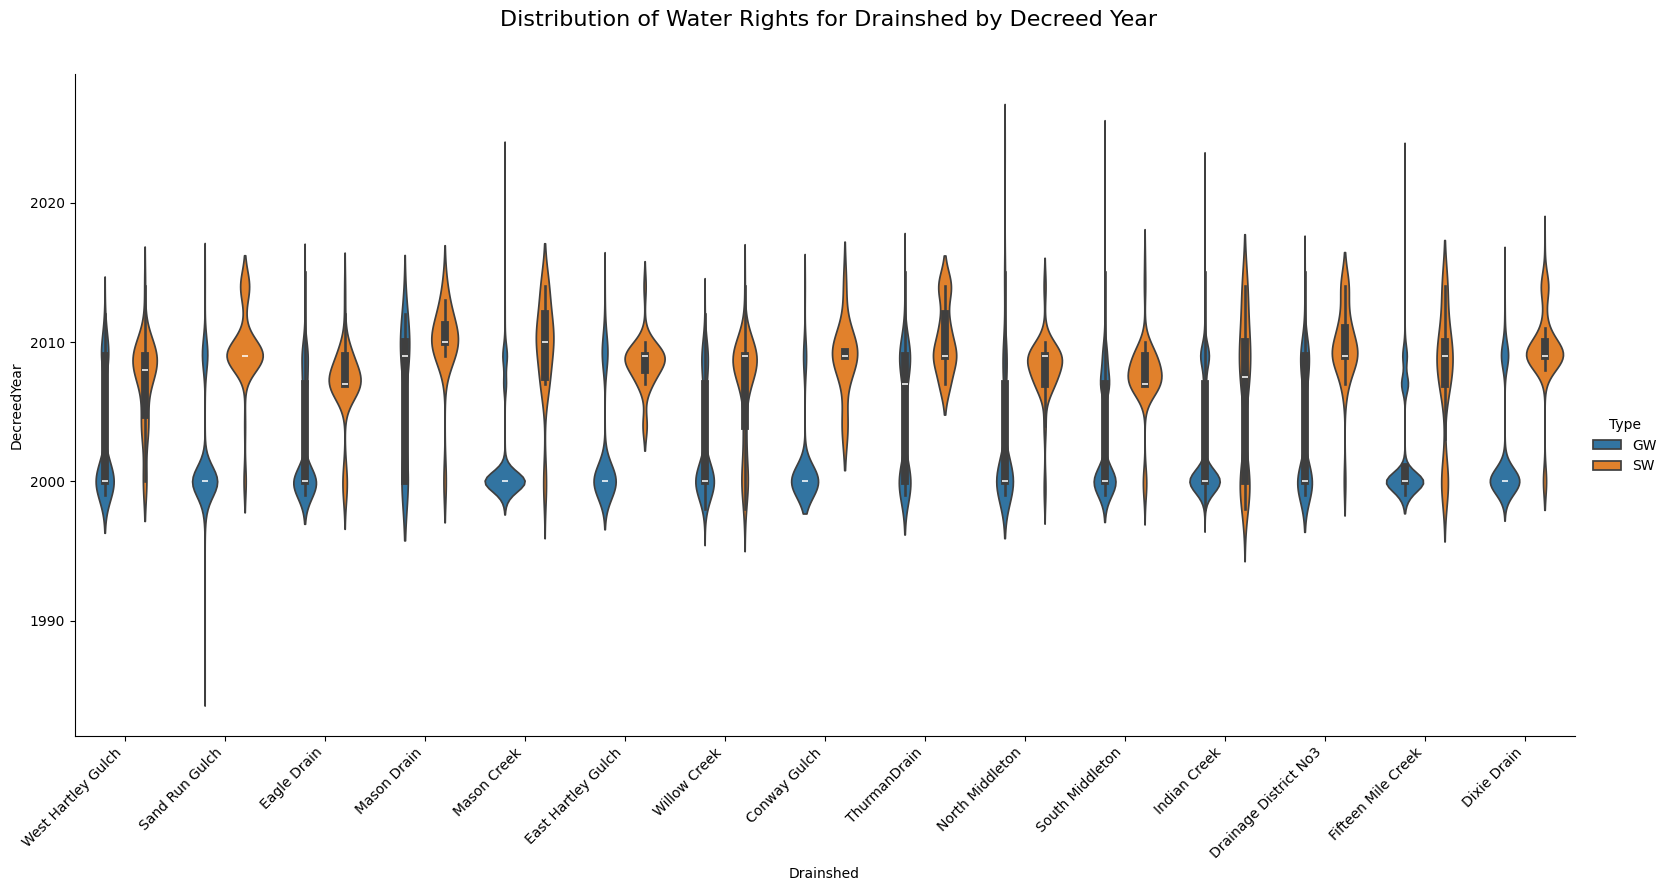

In [ ]:
# ----------------------------------- #
#   SW/GW Comparison in Drainsheds
#       Decreed Year
# ----------------------------------- #

#violin plot of all drainages

file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

# Convert DecreedDat to datetime format and get year
file['DecreedDat'] = pd.to_datetime(file['DecreedDat'])
file['DecreedYear'] = file['DecreedDat'].dt.year

plot = sns.catplot(
    data=file, x="Drainshed", y="DecreedYear", hue="Type",
    kind="violin", height=8, aspect=2)  # Increase height and aspect ratio for larger plot

plot.set_xticklabels(rotation=45, ha='right')
plot.fig.suptitle("Distribution of Water Rights for Drainshed by Decreed Year", fontsize=16)
plot.fig.subplots_adjust(top=0.9)

# Show the plot
plt.show()

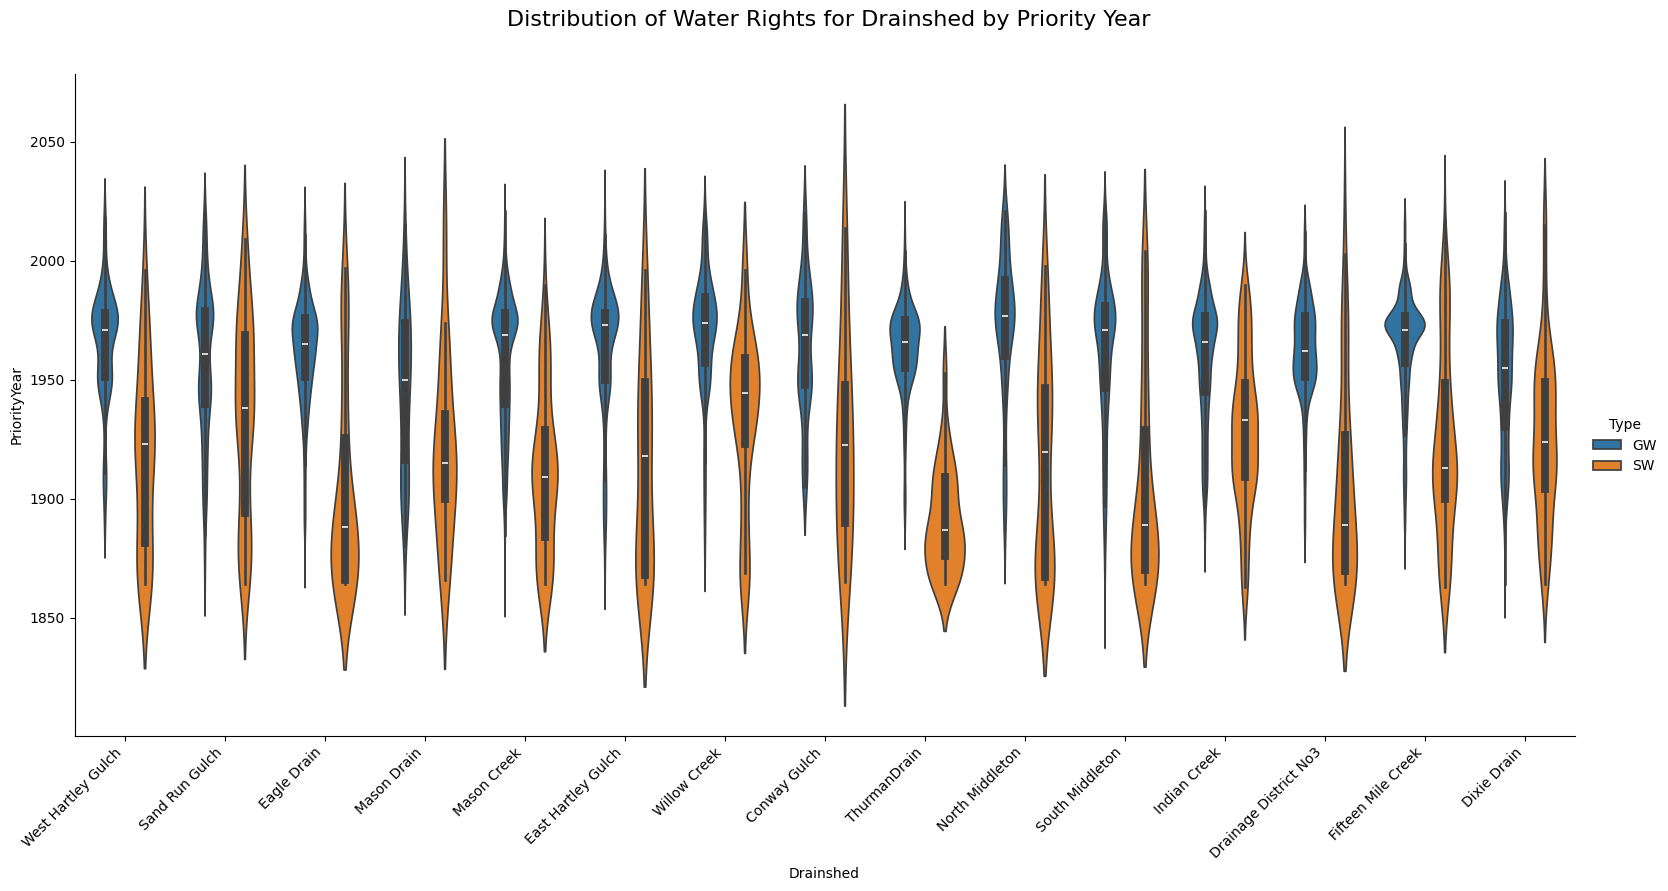

In [ ]:
# ----------------------------------- #
#   SW/GW Comparison in Drainsheds
#       Priority Year
# ----------------------------------- #

#violin plot of all drainages

# Load the data
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

# Convert DecreedDat to datetime format
file['PriorityDa'] = pd.to_datetime(file['PriorityDa'])

# Extract the year from DecreedDat
file['PriorityYear'] = file['PriorityDa'].dt.year

# Plot using sns.catplot
plot = sns.catplot(
    data=file, x="Drainshed", y="PriorityYear", hue="Type",
    kind="violin", height=8, aspect=2)  # Increase height and aspect ratio for larger plot

plot.set_xticklabels(rotation=45, ha='right')
plot.fig.suptitle("Distribution of Water Rights for Drainshed by Priority Year", fontsize=16)
plot.fig.subplots_adjust(top=0.9)

# Show the plot
plt.show()

## 3. Create a figure showing change in water rights over time based on priorty date.

In [7]:
# -------------------- #
#   Import Packages    #
# -------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob
from matplotlib.ticker import MaxNLocator, FuncFormatter

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


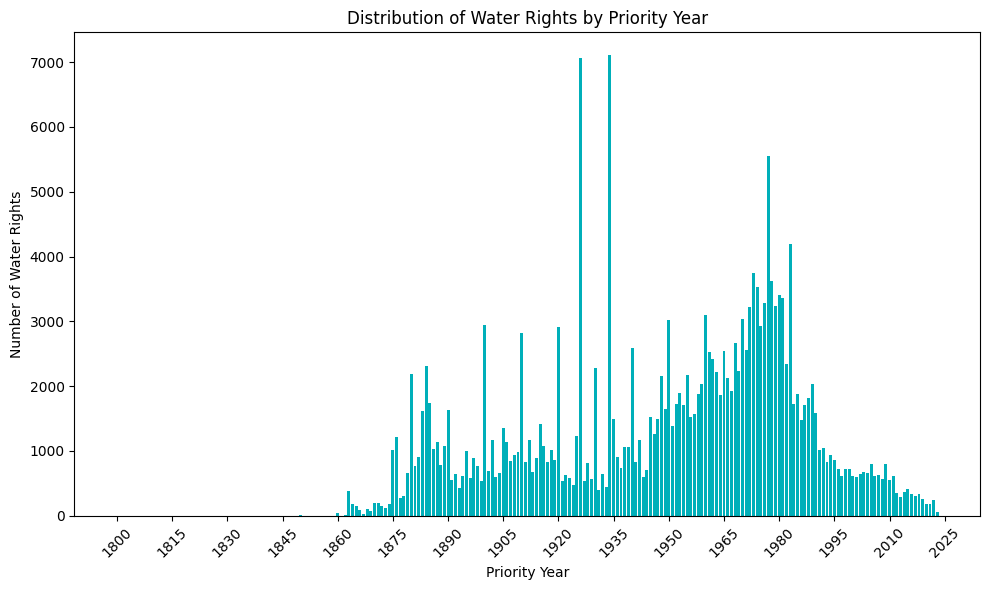

<Figure size 640x480 with 0 Axes>

In [26]:
# ----------------------------------- #
#       Figure for All of TV
#          (priority year)
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year

year_counts = data['PriorityYear'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(year_counts.index, year_counts.values, color='#00AFB9', width =0.8)

ax.xaxis.set_major_locator(MaxNLocator(20))

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Distribution of Water Rights by Priority Year')
plt.xlabel('Priority Year')
plt.ylabel('Number of Water Rights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/total_wr_by_priority_year.png')

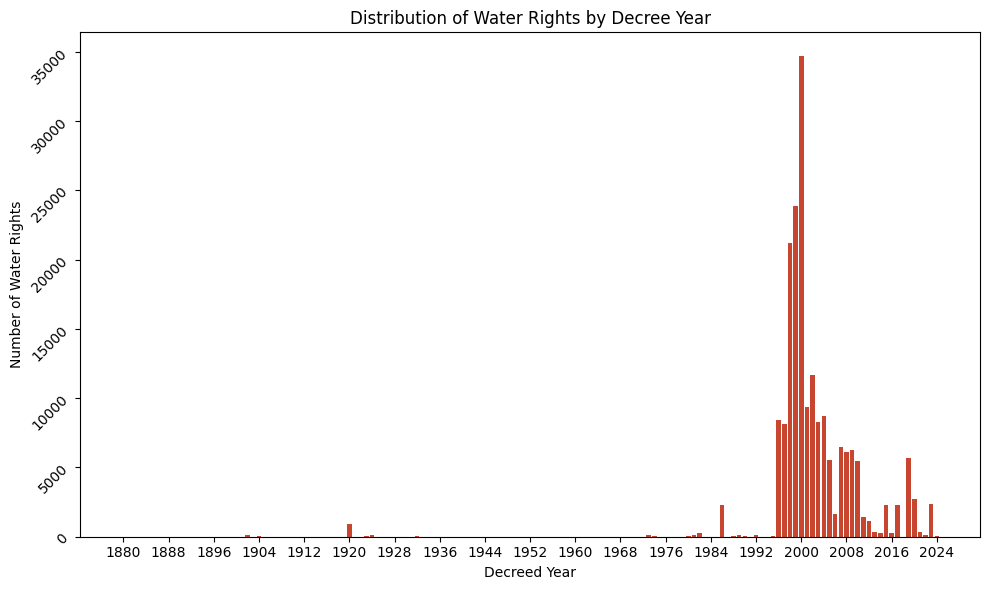

<Figure size 640x480 with 0 Axes>

In [31]:
# ----------------------------------- #
#       Figure for All of TV
#          (decreed year)
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year

year_counts = data['DecreedYear'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(year_counts.index, year_counts.values, color='#C84630')

ax.xaxis.set_major_locator(MaxNLocator(20))

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Distribution of Water Rights by Decree Year')
plt.xlabel('Decreed Year')
plt.ylabel('Number of Water Rights')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/total_wr_by_decreed_year.png')

<ipython-input-33-b232d9a4f989>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Year', y='Type', data=melted_data, palette=custom_palette, scale='count')
<ipython-input-33-b232d9a4f989>:21: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Year', y='Type', data=melted_data, palette=custom_palette, scale='count')


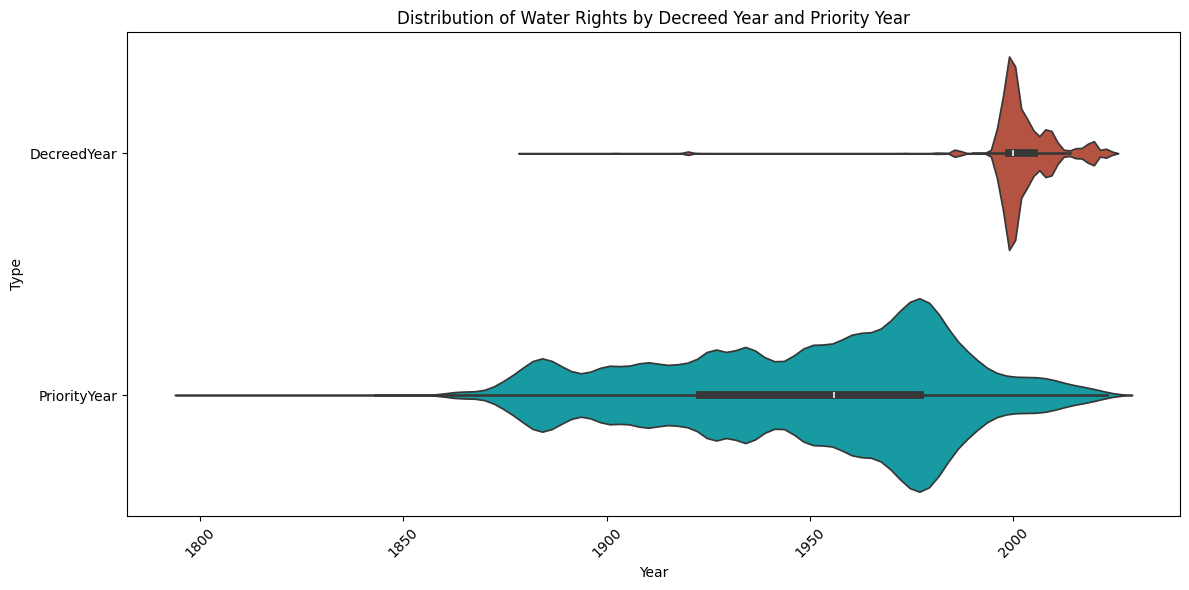

<Figure size 640x480 with 0 Axes>

In [33]:
# ----------------------------------- #
#       Figure for All of TV
#      (decreed + priority year)
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year

data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year


melted_data = pd.melt(data, value_vars=['DecreedYear', 'PriorityYear'], var_name='Type', value_name='Year')

custom_palette = {'DecreedYear': '#C84630', 'PriorityYear': '#00AFB9'}

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='Type', data=melted_data, palette=custom_palette, scale='count')

plt.title('Distribution of Water Rights by Decreed Year and Priority Year')
plt.xlabel('Year')
plt.ylabel('Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/violin_wr_decree_vs_priority.png')


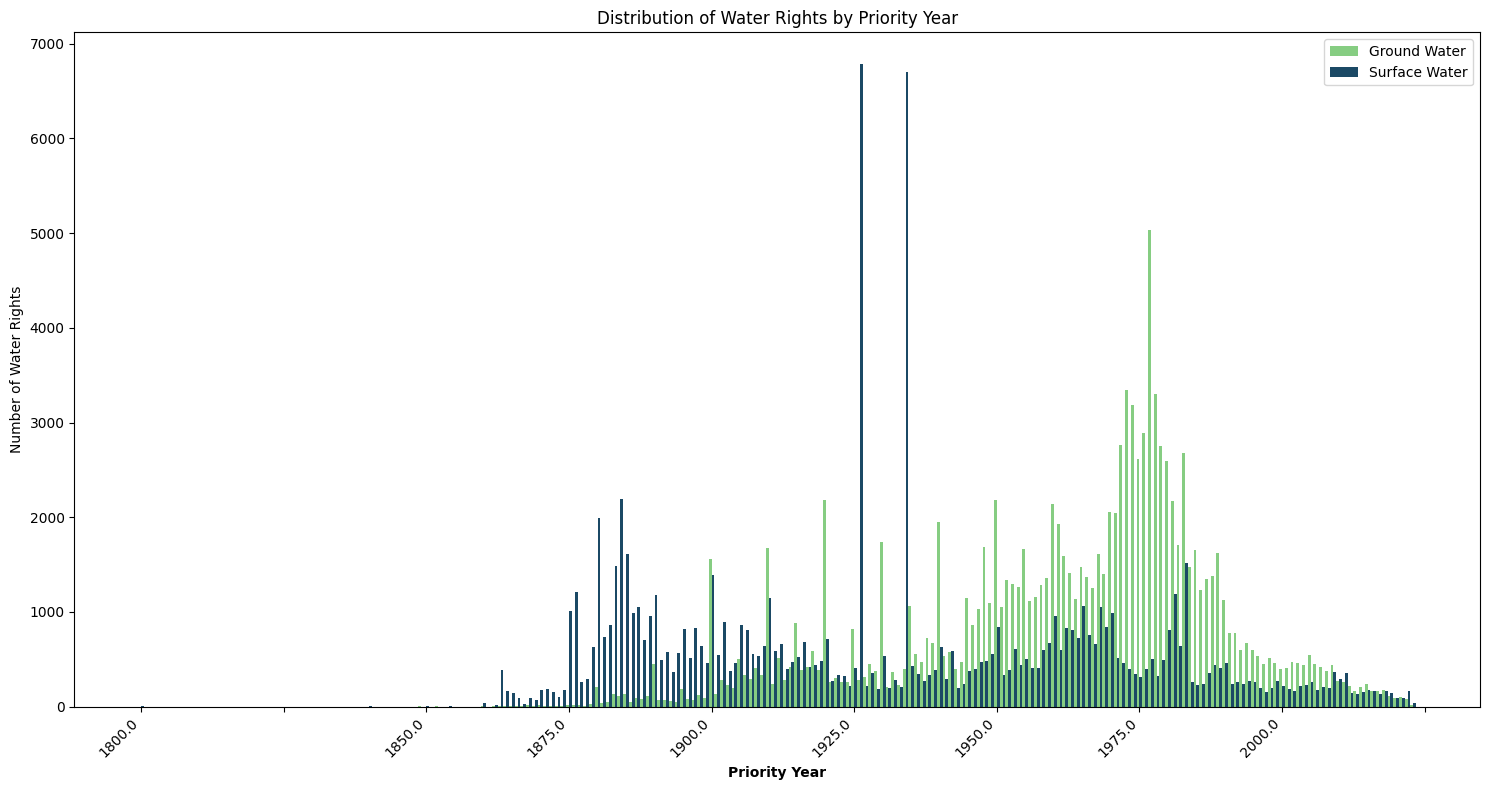

<Figure size 640x480 with 0 Axes>

In [53]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#         (priority year)
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year
groundwater_data = data[data['Source'] == 'GROUND WATER']
other_data = data[data['Source'] != 'GROUND WATER']
year_counts_gw = groundwater_data['PriorityYear'].value_counts().sort_index()
year_counts_sw = other_data['PriorityYear'].value_counts().sort_index()
combined_year_counts = pd.DataFrame({'Ground Water': year_counts_gw, 'Surface Water': year_counts_sw}).fillna(0)
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.5
years = combined_year_counts.index.values

ax.bar(years - bar_width/2, combined_year_counts['Ground Water'], color='#86CD82', width=bar_width, label='Ground Water')
ax.bar(years + bar_width/2, combined_year_counts['Surface Water'], color='#1B4965', width=bar_width, label='Surface Water')

# Set x-axis labels to the actual years
ax.set_xlabel('Priority Year', fontweight='bold')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha="right")

# Limit the number of x-axis ticks to make them more readable
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.set_ylabel('Number of Water Rights')
ax.set_title('Distribution of Water Rights by Priority Year')
ax.legend()
plt.tight_layout()
plt.show()

plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/priority_sw_gw.png')

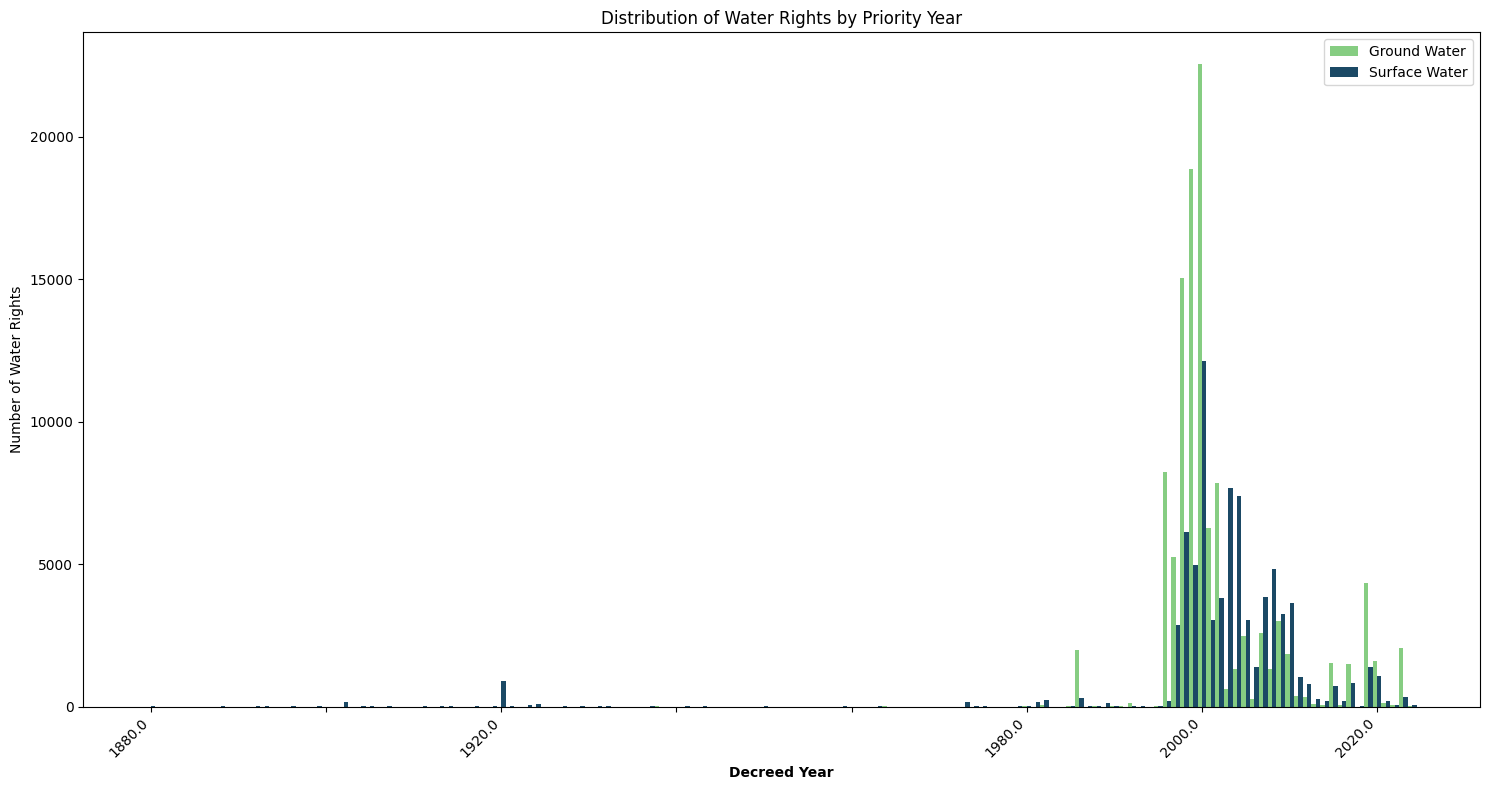

<Figure size 640x480 with 0 Axes>

In [54]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#         (decreed year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year
groundwater_data = data[data['Source'] == 'GROUND WATER']
other_data = data[data['Source'] != 'GROUND WATER']
year_counts_gw = groundwater_data['DecreedYear'].value_counts().sort_index()
year_counts_sw = other_data['DecreedYear'].value_counts().sort_index()
combined_year_counts = pd.DataFrame({'Ground Water': year_counts_gw, 'Surface Water': year_counts_sw}).fillna(0)
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.5
years = combined_year_counts.index.values

ax.bar(years - bar_width/2, combined_year_counts['Ground Water'], color='#86CD82', width=bar_width, label='Ground Water')
ax.bar(years + bar_width/2, combined_year_counts['Surface Water'], color='#1B4965', width=bar_width, label='Surface Water')

# Set x-axis labels to the actual years
ax.set_xlabel('Decreed Year', fontweight='bold')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha="right")

# Limit the number of x-axis ticks to make them more readable
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.set_ylabel('Number of Water Rights')
ax.set_title('Distribution of Water Rights by Priority Year')
ax.legend()
plt.tight_layout()
plt.show()

plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/decreed_sw_gw.png')

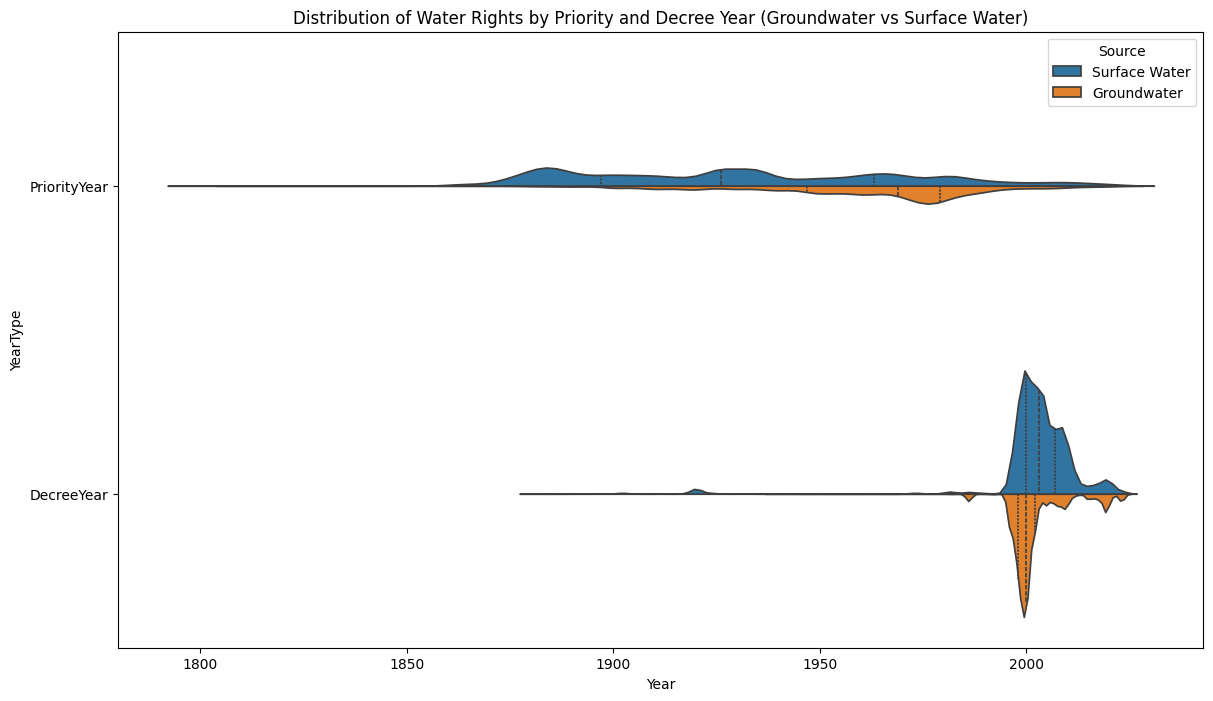

<Figure size 640x480 with 0 Axes>

In [65]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#         (violin plot)
#      (priority + decree)
# ----------------------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
df['PriorityDa'] = pd.to_datetime(df['PriorityDa'])
df['DecreedDat'] = pd.to_datetime(df['DecreedDat'])
df['PriorityYear'] = df['PriorityDa'].dt.year
df['DecreeYear'] = df['DecreedDat'].dt.year


df['Source'] = df['Source'].apply(lambda x: 'Groundwater' if x == 'GROUND WATER' else 'Surface Water')


df_melted = pd.melt(df, id_vars=['Source'],
                    value_vars=['PriorityYear', 'DecreeYear'],
                    var_name='YearType', value_name='Year')


# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Year', y='YearType', hue='Source', data=df_melted, split=True, inner="quartile")
plt.title('Distribution of Water Rights by Priority and Decree Year (Groundwater vs Surface Water)')
plt.show()

plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/violin_all_data.png')

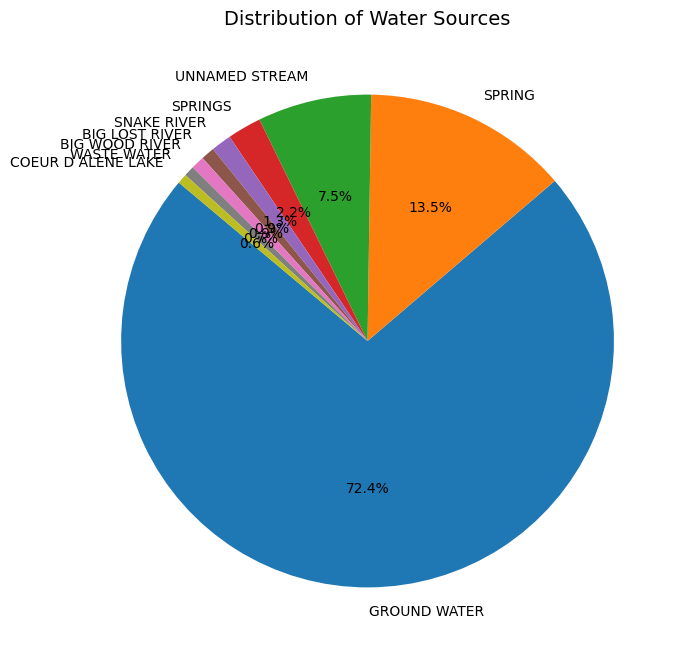

In [ ]:
# ----------------------------------- #
#   Water Sources in the LBRB (pie)   #
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['Source'] = data['Source'].astype(str)

counts = data['Source'].value_counts()
total_count = counts.sum()
filtered_counts = counts[counts / total_count >= 0.005]

plt.figure(figsize=(8, 8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Water Sources', fontsize=14)
plt.setp(plt.gca().texts, fontsize=10)  # Adjust text size as needed
plt.show()

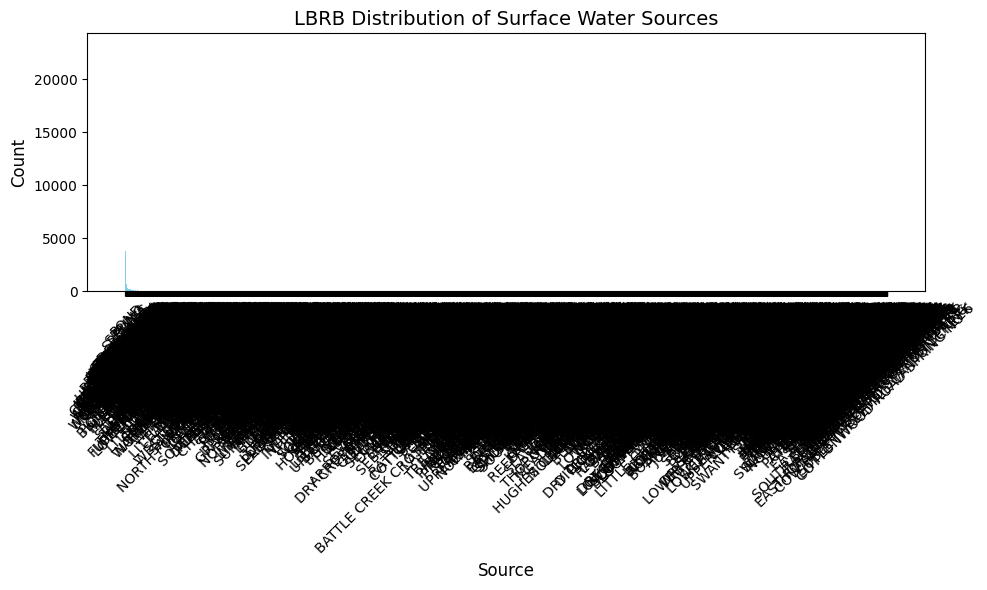

In [ ]:
# ----------------------------------- #
#   Water Sources in the LBRB (bar)
#              excluding GW
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['Source'] = data['Source'].astype(str)

# Filter out 'GROUND WATER' entries
filtered_data = data[data['Source'] != 'GROUND WATER']

# Count occurrences of each source, excluding 'GROUND WATER'
counts = filtered_data['Source'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts, color='skyblue')
plt.title('LBRB Distribution of Surface Water Sources', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

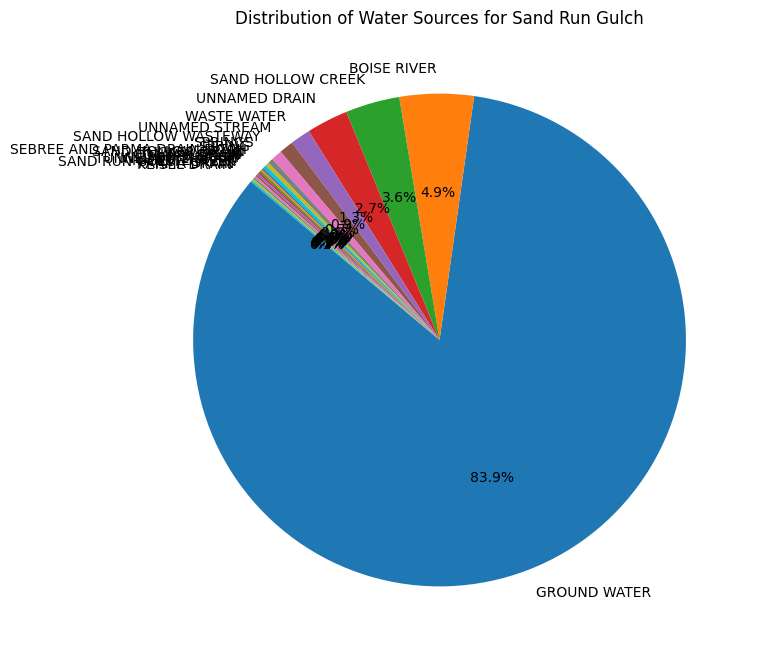

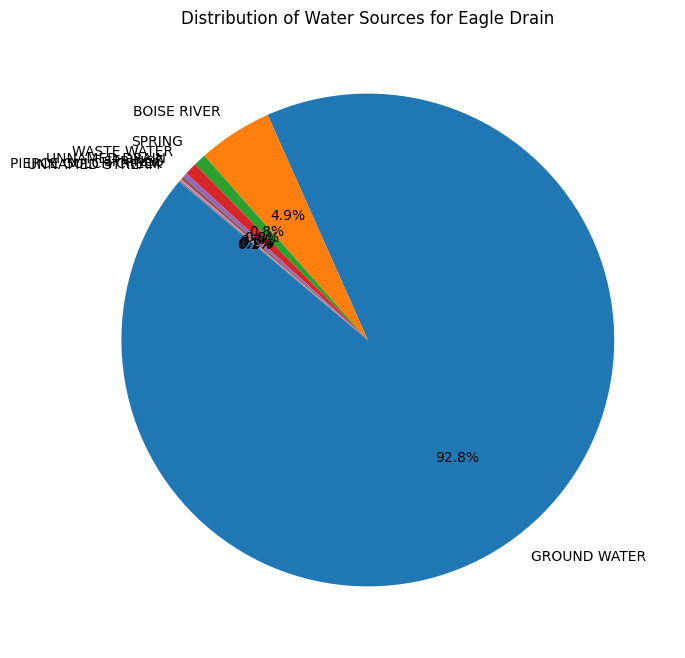

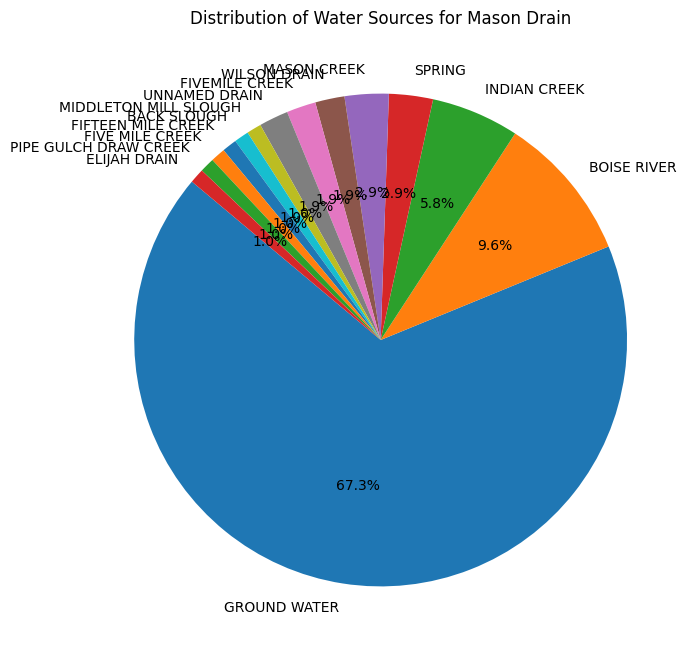

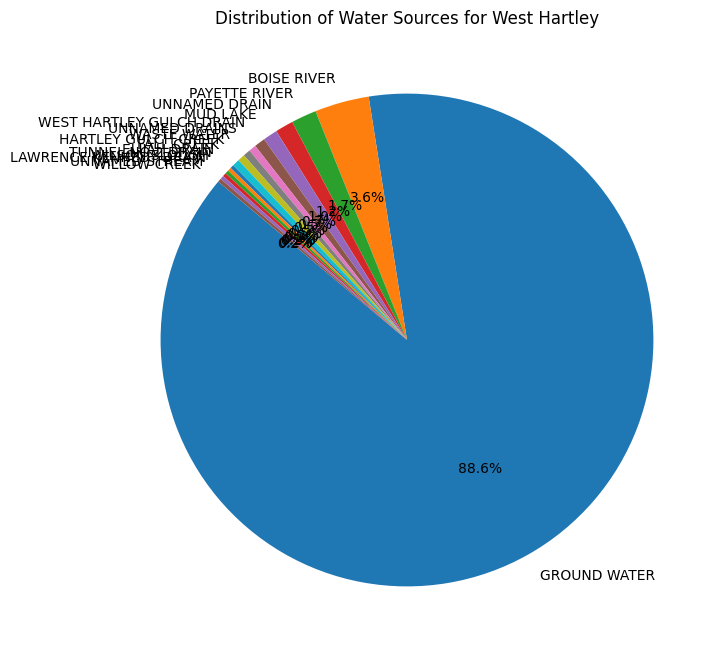

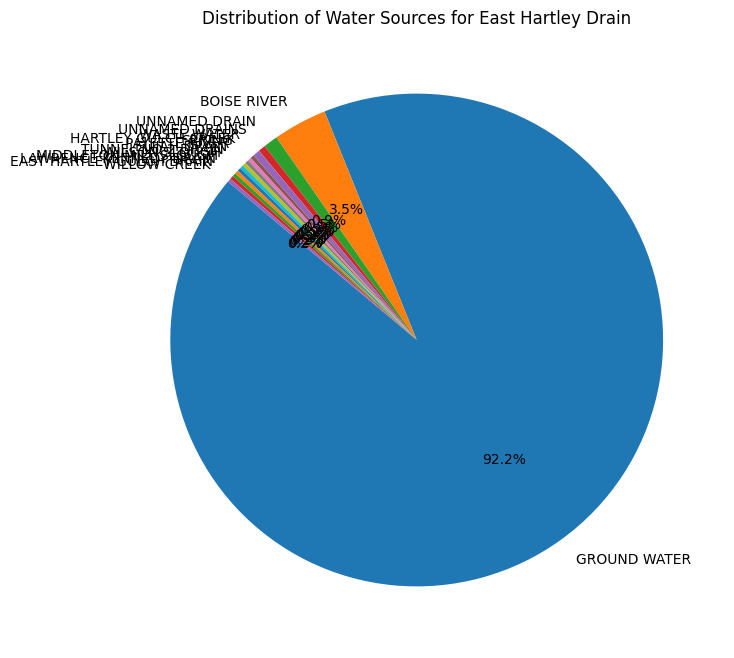

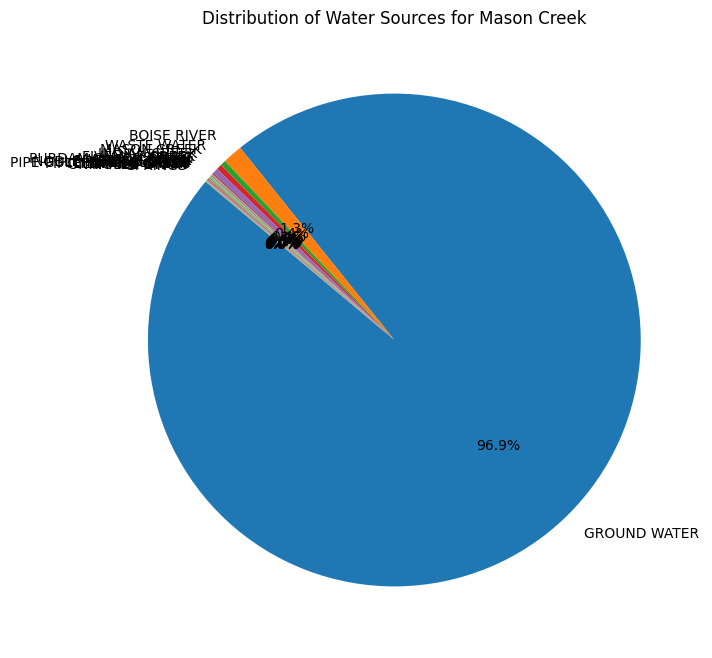

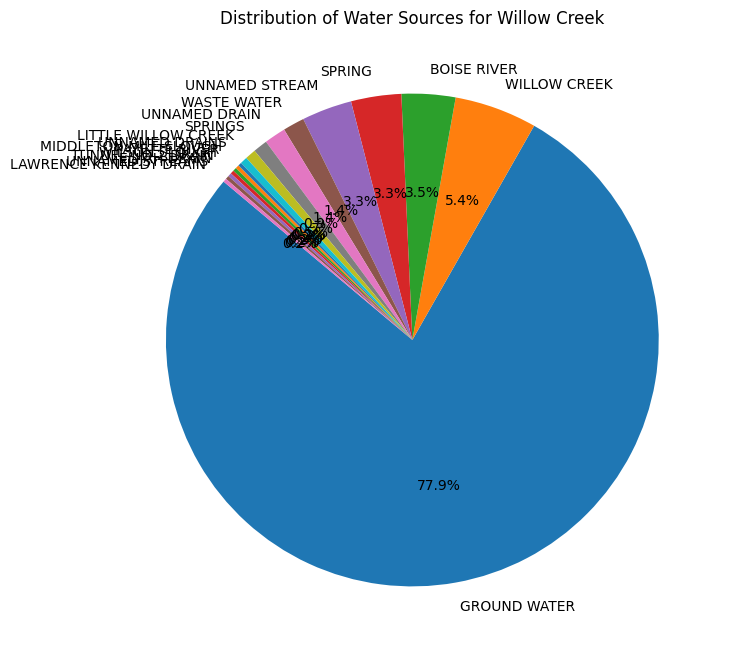

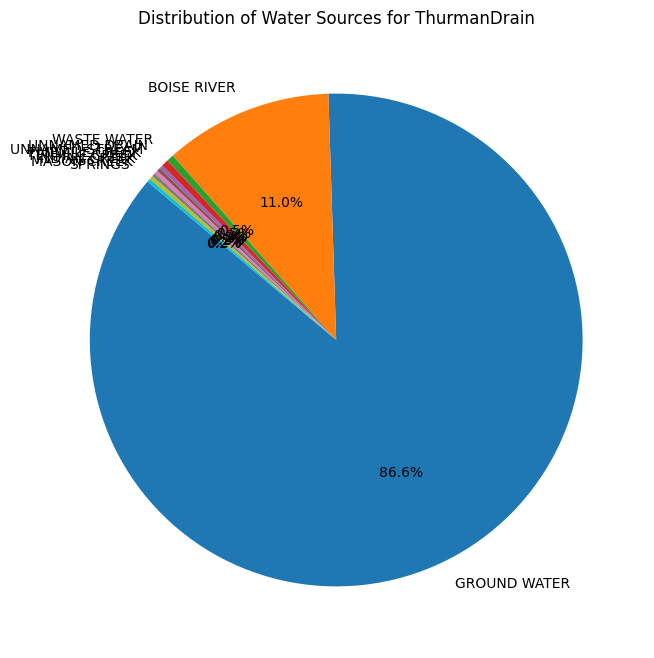

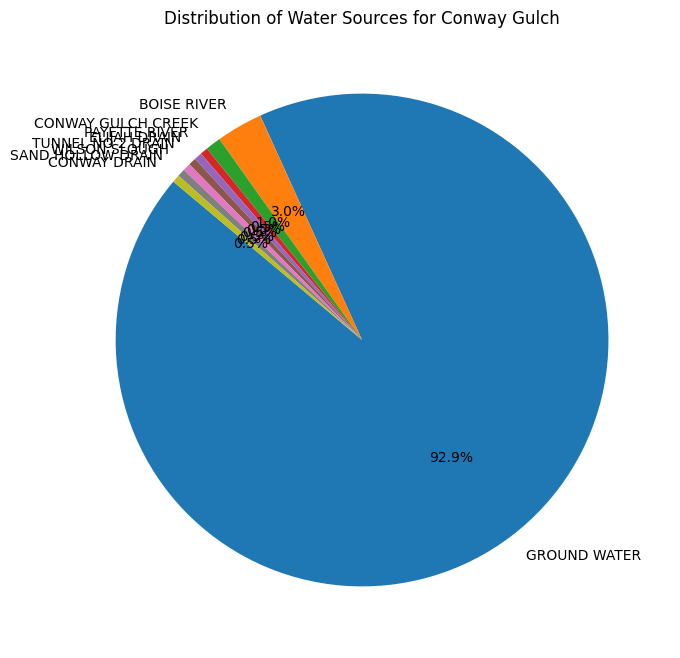

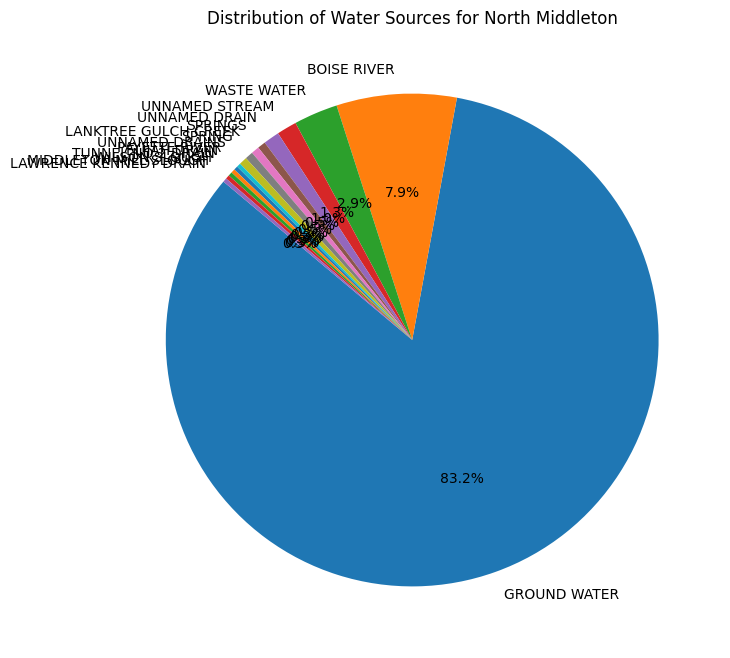

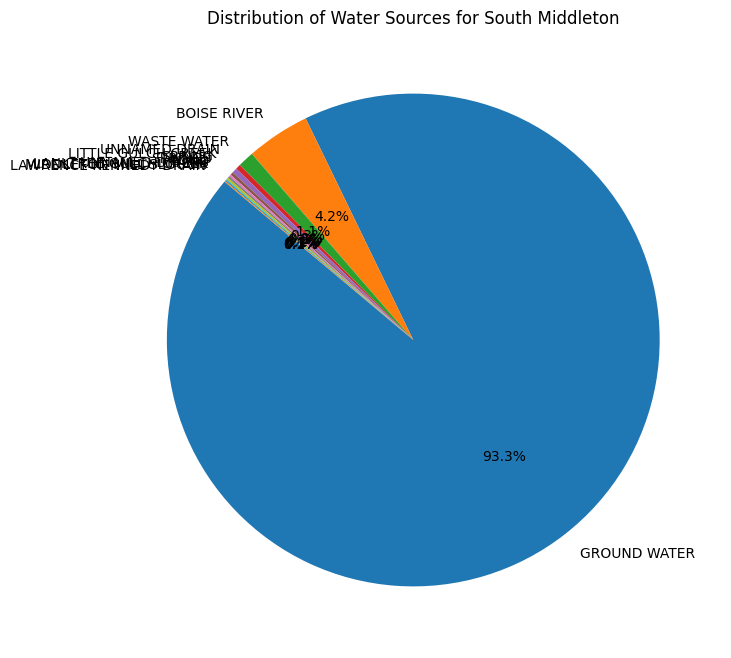

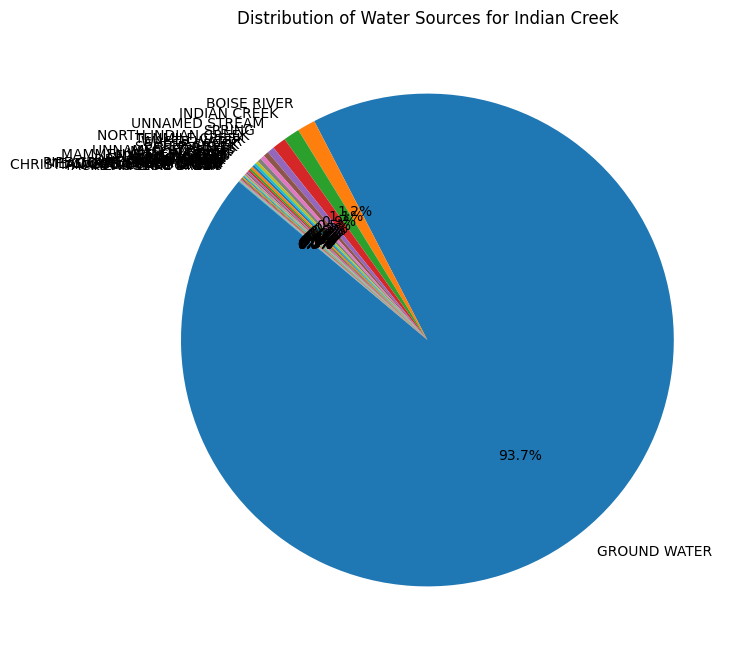

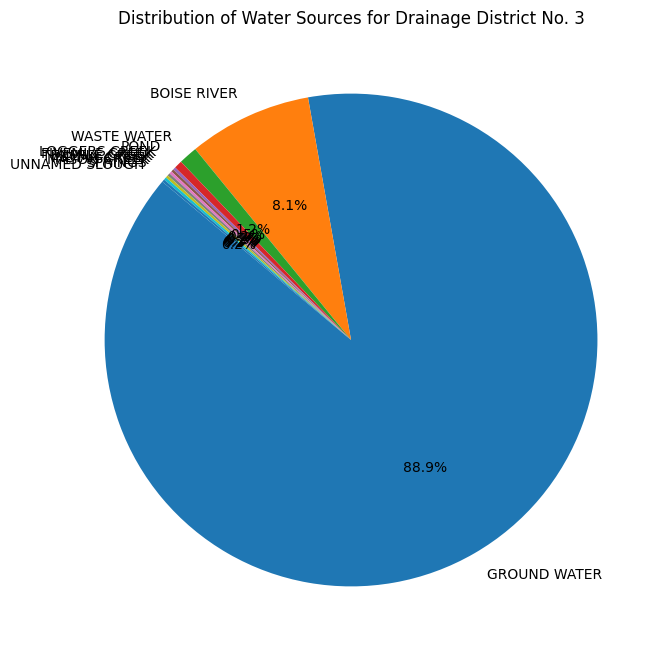

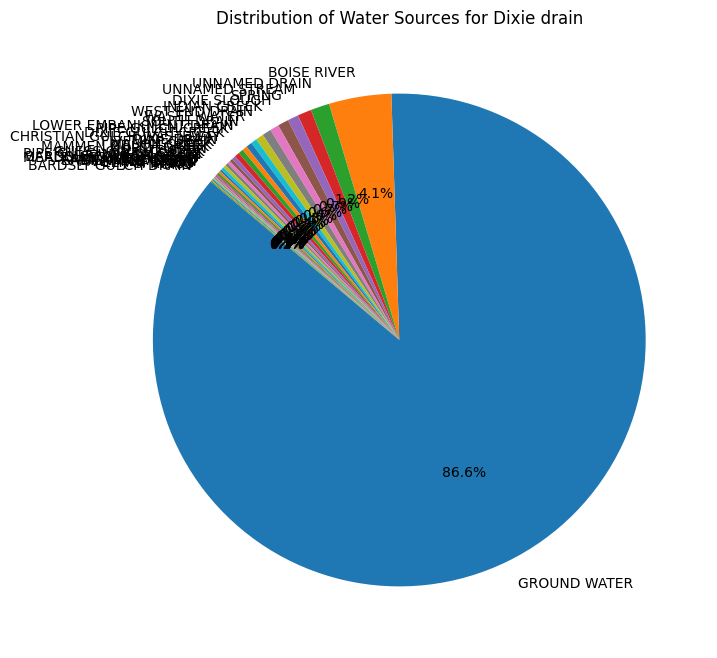

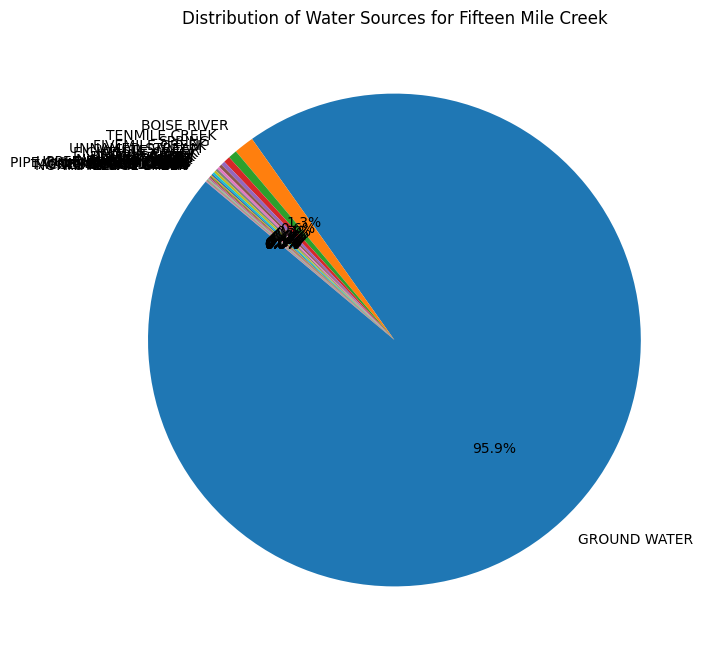

In [ ]:
# ----------------------------------- #
#  Water Sources for each Drainshed   #
# ----------------------------------- #

file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/drainsheds_wr.csv')

drainsheds = file['Drainshed'].unique()

for drainshed in drainsheds:
    drainshed_data = file[file['Drainshed'] == drainshed]

    source_counts = drainshed_data['Source'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140)

    plt.title(f'Distribution of Water Sources for {drainshed}')

    plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data.columns

Index(['WaterRight', 'BasinNumbe', 'SequenceNu', 'SplitSuffi', 'Status',
       'PriorityDa', 'DecreedDat', 'Owner', 'WaterUse', 'WaterUseCo',
       'TotalAcres', 'AcreLimit', 'Source', 'SourceQual', 'TributaryO',
       'Tributar_1', 'WaterDistr', 'LargePOU', 'RightID', 'PlaceOfUse',
       'WRReport', 'WRDocs', 'WRMap', 'TrustOrNon', 'SHAPE_STAr',
       'SHAPE_STLe'],
      dtype='object')

In [ ]:
# ----------------------------------- #
#  Water Sources for the TV
#        (Sankey Diagram)
# ----------------------------------- #
import plotly.graph_objects as go

file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

# Filter out sources with less than 1 unit
filtered_data = file[file['AcreLimit'] >= 1]

# Extract unique nodes for sources and drainsheds
sources = filtered_data['Source'].unique().tolist()
drainsheds = filtered_data['Drainshed'].unique().tolist()

# Combine sources and drainsheds into nodes list
nodes = sources + drainsheds

# Create a mapping from node names to indices
node_indices = {node: idx for idx, node in enumerate(nodes)}

# Prepare source, target, and value for the Sankey diagram
source_indices = filtered_data['Source'].map(node_indices)
target_indices = filtered_data['Drainshed'].map(node_indices)
values = filtered_data['AcreLimit']

# Assign different colors to each link based on Source
colors = filtered_data['Source'].map(lambda x: f'rgb({hash(x) % 255},{(hash(x)//255) % 255},{(hash(x)//255**2) % 255})').tolist()

# Create the Sankey diagram data
sankey_data = {
    'node': {
        'pad': 30,  # Increased padding for more spacing between nodes
        'thickness': 20,  # Adjust thickness to make nodes more distinct
        'line': {'color': 'black', 'width': 0.5},
        'label': nodes,  # Labels for sources and drainsheds
        'color': ['rgba(255,255,255,1)' for node in nodes]  # Make all nodes visible
    },
    'link': {
        'source': source_indices.tolist(),
        'target': target_indices.tolist(),
        'value': values.tolist(),
        'color': colors  # Different colors for each Source
    }
}

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=sankey_data['node']['pad'],
        thickness=sankey_data['node']['thickness'],
        line=sankey_data['node']['line'],
        label=sankey_data['node']['label'],
        color=sankey_data['node']['color']
    ),
    link=dict(
        source=sankey_data['link']['source'],
        target=sankey_data['link']['target'],
        value=sankey_data['link']['value'],
        color=sankey_data['link']['color']
    )
)])

# Update layout
fig.update_layout(
    title_text="Water Distribution from Sources to Drainsheds",
    font=dict(size=10, color='black')
)

# Show the figure
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Load the data
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

# Filter out sources with less than 1 unit
filtered_data = file[file['AcreLimit'] >= 1]

# Count the number of drainages that use the same source
source_counts = filtered_data.groupby('Source')['Drainshed'].count().reset_index(name='DrainageCount')

# Extract unique nodes for sources and drainsheds
sources = filtered_data['Source'].unique().tolist()
drainsheds = filtered_data['Drainshed'].unique().tolist()

# Combine sources and drainsheds into nodes list
nodes = sources + drainsheds

# Create a mapping from node names to indices
node_indices = {node: idx for idx, node in enumerate(nodes)}

# Prepare source, target, and value for the diagram
source_indices = filtered_data['Source'].map(node_indices)
target_indices = filtered_data['Drainshed'].map(node_indices)
values = filtered_data['AcreLimit']

# Calculate positions of nodes (left for sources, right for drainsheds)
n_sources = len(sources)
n_drainsheds = len(drainsheds)

node_x = [0] * n_sources + [1] * n_drainsheds  # x=0 for sources, x=1 for drainsheds
node_y = np.linspace(0, 1, n_sources).tolist() + np.linspace(0, 1, n_drainsheds).tolist()  # Evenly space nodes vertically

# Create a scatter plot for nodes (left-aligned text for sources, right-aligned text for drainsheds)
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=nodes,
    marker=dict(size=10, color='lightblue'),
    textposition=["middle left"] * n_sources + ["middle right"] * n_drainsheds  # Align text according to node type
)

# Create arcs for the connections with weight based on the number of drainages using the same source
arc_traces = []
for src, tgt, val in zip(source_indices, target_indices, values):
    x0, y0 = node_x[src], node_y[src]
    x1, y1 = node_x[tgt], node_y[tgt]

    # Assign the weight based on the count of drainages
    weight = source_counts.loc[source_counts['Source'] == nodes[src], 'DrainageCount'].values[0]

    # Create a trace for the arc
    arc_traces.append(go.Scatter(
        x=[x0, (x0 + x1) / 2, x1],
        y=[y0, (y0 + y1) / 2 + 0.1, y1],
        mode='lines',
        line=dict(color='rgba(0, 100, 255, 0.6)', width=weight),
        hoverinfo='none'
    ))

# Combine the traces
fig = go.Figure(data=[node_trace] + arc_traces)

# Update layout to center the chart
fig.update_layout(
    title_text="Chord-like Diagram of Water Distribution from Sources to Drainsheds",
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor='white',
    width=700,
    height=700
)

# Show the figure
fig.show()


In [ ]:
# ----------------------------------- #
#  Water Sources for each Drainshed
#           (Sankey Diagrams)
# ----------------------------------- #

import plotly.graph_objects as go
import pandas as pd
import numpy as np
import glob

# Load the data
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

# Filter out sources with less than 1 unit
filtered_data = file[file['AcreLimit'] >= 1]

# Get the unique list of Drainsheds
drainsheds = filtered_data['Drainshed'].unique()

# Function to create a Sankey diagram for each Drainshed
def create_sankey_for_drainshed(data, drainshed):
    # Filter data for the current drainshed
    drainshed_data = data[data['Drainshed'] == drainshed]

    # Extract unique sources for the current drainshed
    sources = drainshed_data['Source'].unique().tolist()

    # Nodes are just the sources and the single drainshed
    nodes = sources + [drainshed]

    # Create a mapping from node names to indices
    node_indices = {node: idx for idx, node in enumerate(nodes)}

    # Prepare source, target, and value for the Sankey diagram
    source_indices = drainshed_data['Source'].map(node_indices)
    target_indices = [node_indices[drainshed]] * len(drainshed_data)
    values = drainshed_data['AcreLimit']

    # Assign different colors to each link based on Source
    colors = drainshed_data['Source'].map(lambda x: f'rgb({hash(x) % 255},{(hash(x)//255) % 255},{(hash(x)//255**2) % 255})').tolist()

    # Create the Sankey diagram data
    sankey_data = {
        'node': {
            'pad': 30,  # Increased padding for more spacing between nodes
            'thickness': 20,  # Adjust thickness to make nodes more distinct
            'line': {'color': 'black', 'width': 0.5},
            'label': nodes,  # Labels for sources and the drainshed
            'color': ['rgba(255,255,255,1)' for node in nodes]  # Make all nodes visible
        },
        'link': {
            'source': source_indices.tolist(),
            'target': target_indices,
            'value': values.tolist(),
            'color': colors  # Different colors for each Source
        }
    }

    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=sankey_data['node']['pad'],
            thickness=sankey_data['node']['thickness'],
            line=sankey_data['node']['line'],
            label=sankey_data['node']['label'],
            color=sankey_data['node']['color']
        ),
        link=dict(
            source=sankey_data['link']['source'],
            target=sankey_data['link']['target'],
            value=sankey_data['link']['value'],
            color=sankey_data['link']['color']
        )
    )])

    # Update layout
    fig.update_layout(
        title_text=f"Water Distribution for Drainshed: {drainshed}",
        font=dict(size=10, color='black')
    )

    # Show the figure
    fig.show()

# Loop through each drainshed and create a Sankey diagram
for drainshed in drainsheds:
    create_sankey_for_drainshed(filtered_data, drainshed)


In [ ]:
# Load the data
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

# Filter out sources with less than 1 unit
filtered_data = file[file['AcreLimit'] >= 1]

# Get the unique list of Drainsheds
drainsheds = filtered_data['Drainshed'].unique()

# Function to create a circular-like Sankey diagram for each Drainshed
def create_circular_sankey_for_drainshed(data, drainshed):
    # Filter data for the current drainshed
    drainshed_data = data[data['Drainshed'] == drainshed]

    # Extract unique sources for the current drainshed
    sources = drainshed_data['Source'].unique().tolist()

    # Nodes are just the sources and the single drainshed
    nodes = sources + [drainshed]

    # Create a mapping from node names to indices
    node_indices = {node: idx for idx, node in enumerate(nodes)}

    # Prepare source, target, and value for the Sankey diagram
    source_indices = drainshed_data['Source'].map(node_indices)
    target_indices = [node_indices[drainshed]] * len(drainshed_data)
    values = drainshed_data['AcreLimit']

    # Assign different colors to each link based on Source
    colors = drainshed_data['Source'].map(lambda x: f'rgb({hash(x) % 255},{(hash(x)//255) % 255},{(hash(x)//255**2) % 255})').tolist()

    # Circular node positioning (half-circle for sources, half-circle for drainshed)
    num_sources = len(sources)
    angle_step = np.pi / (num_sources + 1)  # Semi-circle for sources
    radius = 0.45

    # Calculate positions for sources (left side of the circle)
    node_x = [0.5 + radius * np.cos(np.pi + i * angle_step) for i in range(num_sources)]
    node_y = [0.5 + radius * np.sin(np.pi + i * angle_step) for i in range(num_sources)]

    # Position the drainshed directly opposite (right side of the circle)
    node_x.append(0.5 + radius * np.cos(0))  # Rightmost point on the circle
    node_y.append(0.5 + radius * np.sin(0))

    # Create the Sankey diagram data with custom positions
    sankey_data = {
        'node': {
            'pad': 15,
            'thickness': 20,
            'line': {'color': 'black', 'width': 2},
            'label': nodes,  # Labels for sources and the drainshed
            'x': node_x,
            'y': node_y,
            'color': ['rgba(255,255,255,1)' for node in nodes]  # Make all nodes visible
        },
        'link': {
            'source': source_indices.tolist(),
            'target': target_indices,
            'value': values.tolist(),
            'color': colors,  # Different colors for each Source
            'line': {'color': 'black', 'width': 1.5}  # Increase line weight
        }
    }

    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=sankey_data['node']['pad'],
            thickness=sankey_data['node']['thickness'],
            line=sankey_data['node']['line'],
            label=sankey_data['node']['label'],
            color=sankey_data['node']['color'],
            x=sankey_data['node']['x'],
            y=sankey_data['node']['y']
        ),
        link=dict(
            source=sankey_data['link']['source'],
            target=sankey_data['link']['target'],
            value=sankey_data['link']['value'],
            color=sankey_data['link']['color'],
            line=sankey_data['link']['line']
        )
    )])

    # Update layout
    fig.update_layout(
        title_text=f"Water Distribution for Drainshed: {drainshed}",
        font=dict(size=10, color='black'),
        plot_bgcolor='white',
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )

    # Show the figure
    fig.show()

# Loop through each drainshed and create a circular-like Sankey diagram
for drainshed in drainsheds:
    create_circular_sankey_for_drainshed(filtered_data, drainshed)